# Sectoral shifts in Denmark from 2010 to 2021

The data project on sectoral shifts delves into the business structure in Denmark from 2010 to 2021, broken down by industries within the non-financial business sector. The data is from Statistics Denmark, specifically table GF3. The dataset contains information about the number of firms in Denmark, categorized by different sectors within the non-financial business sector. It covers the years from 2010 to 2021 and shows the development in the number of firms within sectors such as industry, construction, trade and transport, information and communication, real estate, and business services.

We clean the dataset and then perform a descriptive analysis, among other methods, to identify trends over time both within each industry and across the overall number of firms. The goal is to identify the structure of the sectors in Denmark and the transition into new sectors over time.

The data is downloaded from Statistics Denmark and uploaded to our repository.

## Code structure

1. Import packages
2. Reading and cleaning of data
3. Descriptive statistics
4. Data exploration and analysis
5. Conclusion

## Import packages

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

#autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Reading and cleaning of data

We now import the dataset from Statistics Denmark. The dataset is called virksomheder.xlsx and is placed in the 'data' folder.

In [2]:
import os 

#We use assert to check if the path 'Data/' exists and is a directory. Afterwards we check if the path 'Data/virksomheder.xlsx' exists 
#and is a file.
assert os.path.isdir('Data/')
assert os.path.isfile('Data/virksomheder.xlsx')

The path 'Data/virksomheder.xlsx' exists and we now continue and have a look on the raw dataset.

In [3]:
filename = 'Data/virksomheder.xlsx' 
#We read the Excel file using the specified filename and return it as a pandas dataframe only showing the first four rows of the dataframe.
pd.read_excel(filename).head(4)

,"General business statistics by municipality group, industry (DB07 10-group) and time",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Unit: Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,All Denmark,"Industry, raw material extraction and utility ...",20155.0,20312.0,20228.0,19667.0,19584.0,19341.0,19610.0,19698.0,19747.0,19840.0,19629.0,19636.0
3,NaN,Construction and civil engineering,31588.0,31575.0,31300.0,30707.0,31280.0,31197.0,31973.0,32643.0,33306.0,33937.0,34756.0,35949.0


As seen from the above dataframe we have to clean the data a bit. 'Firm' is created to store the dataframe.

In [4]:
#We start by skipping the first two rows. 
firm = pd.read_excel(filename, skiprows=2)
#Then we return the first four rows of the dataframe to provide an overview of the data.
firm.head(4)

,Unnamed: 0,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,All Denmark,"Industry, raw material extraction and utility ...",20155,20312,20228,19667,19584,19341,19610,19698,19747,19840,19629,19636
1,NaN,Construction and civil engineering,31588,31575,31300,30707,31280,31197,31973,32643,33306,33937,34756,35949
2,NaN,Trade and transport etc.,71035,70428,69508,67656,66781,65635,66816,67559,67121,67149,66412,67232
3,NaN,Information and communication,13597,14588,14962,15409,16109,16109,17130,17992,18492,18970,19003,19448


In [5]:
#We now exclude the first column.
firm = firm.iloc[:, 1:]
firm.head(4)

,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Industry, raw material extraction and utility ...",20155,20312,20228,19667,19584,19341,19610,19698,19747,19840,19629,19636
1,Construction and civil engineering,31588,31575,31300,30707,31280,31197,31973,32643,33306,33937,34756,35949
2,Trade and transport etc.,71035,70428,69508,67656,66781,65635,66816,67559,67121,67149,66412,67232
3,Information and communication,13597,14588,14962,15409,16109,16109,17130,17992,18492,18970,19003,19448


In [6]:
#We rename the column to 'Sector'.
firm.rename(columns = {'Unnamed: 1':'Sector'}, inplace=True)
firm.head(4)

,Sector,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Industry, raw material extraction and utility ...",20155,20312,20228,19667,19584,19341,19610,19698,19747,19840,19629,19636
1,Construction and civil engineering,31588,31575,31300,30707,31280,31197,31973,32643,33306,33937,34756,35949
2,Trade and transport etc.,71035,70428,69508,67656,66781,65635,66816,67559,67121,67149,66412,67232
3,Information and communication,13597,14588,14962,15409,16109,16109,17130,17992,18492,18970,19003,19448


We now rename each column to avoid conflicts. When we use the string version of the year as the key it helps to distinguish between numbers and text. We create a dictionary that maps each of the years {2010, ..., 2021} to {firm2010, ..., firm2021}.

In [7]:
#We create an empty dictionary.
col_dict = {}
#Through each year from 2010 to 2021.
for i in range(2010, 2021+1): 
    #We now convert the year to a string where the value will be the word 'firm' followed by the year.
    col_dict[str(i)] = f'firm{i}'

col_dict = {str(i) : f'firm{i}' for i in range(2010,2021+1)}
col_dict

{'2010': 'firm2010',
 '2011': 'firm2011',
 '2012': 'firm2012',
 '2013': 'firm2013',
 '2014': 'firm2014',
 '2015': 'firm2015',
 '2016': 'firm2016',
 '2017': 'firm2017',
 '2018': 'firm2018',
 '2019': 'firm2019',
 '2020': 'firm2020',
 '2021': 'firm2021'}

We rename the columns of the firm dataframe based on the names provided in col_dict and print the six rows.

In [8]:
firm.rename(columns = col_dict, inplace=True)
firm.head(6)

,Sector,firm2010,firm2011,firm2012,firm2013,firm2014,firm2015,firm2016,firm2017,firm2018,firm2019,firm2020,firm2021
0,"Industry, raw material extraction and utility ...",20155,20312,20228,19667,19584,19341,19610,19698,19747,19840,19629,19636
1,Construction and civil engineering,31588,31575,31300,30707,31280,31197,31973,32643,33306,33937,34756,35949
2,Trade and transport etc.,71035,70428,69508,67656,66781,65635,66816,67559,67121,67149,66412,67232
3,Information and communication,13597,14588,14962,15409,16109,16109,17130,17992,18492,18970,19003,19448
4,Real estate trading and renting,24664,27220,27398,27574,27464,26935,28448,29216,29654,29644,30296,30935
5,Business service,45520,47637,48347,48810,50021,50038,53054,54721,55923,57584,57904,59768


# Descriptive statistics

Now, we will examinw the descriptive statistics.

In [9]:
firm.describe()

,firm2010,firm2011,firm2012,firm2013,firm2014,firm2015,firm2016,firm2017,firm2018,firm2019,firm2020,firm2021
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,34426.500000,35293.333333,35290.500000,34970.500000,35206.500000,34875.833333,36171.833333,36971.500000,37373.833333,37854.000000,38000.000000,38828.000000
std,20995.977165,20586.242004,20296.068405,19746.436182,19496.457019,19215.271847,19688.809232,19940.505618,19861.205839,20056.552874,19857.823456,20296.680369
min,13597.000000,14588.000000,14962.000000,15409.000000,16109.000000,16109.000000,17130.000000,17992.000000,18492.000000,18970.000000,19003.000000,19448.000000
25%,21282.250000,22039.000000,22020.500000,21643.750000,21554.000000,21239.500000,21819.500000,22077.500000,22223.750000,22291.000000,22295.750000,22460.750000
50%,28126.000000,29397.500000,29349.000000,29140.500000,29372.000000,29066.000000,30210.500000,30929.500000,31480.000000,31790.500000,32526.000000,33442.000000
75%,42037.000000,43621.500000,44085.250000,44284.250000,45335.750000,45327.750000,47783.750000,49201.500000,50268.750000,51672.250000,52117.000000,53813.250000
max,71035.000000,70428.000000,69508.000000,67656.000000,66781.000000,65635.000000,66816.000000,67559.000000,67121.000000,67149.000000,66412.000000,67232.000000


The descriptive statistics display the values across all sectors in Denmark, from the mean value to the percentiles, for the years 2010 to 2021. The mean number of firms spans from 34424 in 2010 to 38828 in 2021 across the sectors. In 2021, the smallest number of firms in the six sectors was 19448, and the maximum number of firms in the sectors was 67232.

# Data exploration and analysis

In this section, we will visually present the data using various methods. We will start by illustrating the development of each sector over time. This will enable us to gain insight into the various trends and compare different sectors. Further, we will observe which sectors are dominant in the Danish business environment, which sectors are decreasing or increasing over time, and which sectors are becoming more important through time and which are not.

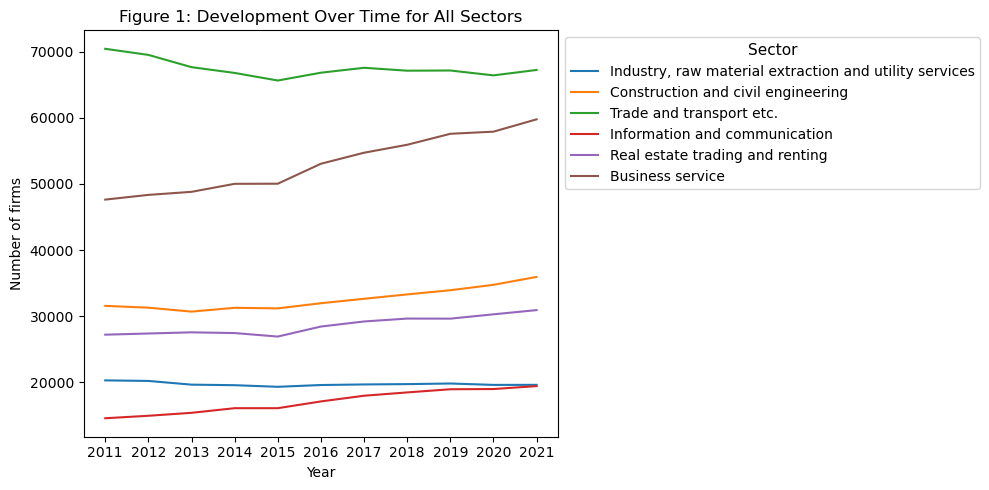

In [10]:
plt.figure(figsize=(10, 5)) 

#We will plot each sector's data
for sector_index in range(len(firm)):
    #We select data for the current sector, excluding the first two columns
    sector_data = firm.iloc[sector_index, 2:]
    #and retrieve the name of the current sector.
    sector_name = firm.iloc[sector_index, 0]
    #We plot the data for the sector with labels indicating the name of the sector.
    plt.plot(sector_data.index, sector_data.values, label=sector_name)

#We set the title and labels for the x and y axes.
plt.title('Figure 1: Development Over Time for All Sectors', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of firms', fontsize=10)

#We extract the year part from the column names for the x-axis labels so it just shows the year instead of firmYYYY.
years = [col[4:] for col in sector_data.index]

#We set the x-axis to be the years.
plt.xticks(ticks=range(len(years)), labels=years)

#We add a legend with a title 'Sector', set the font sizes for the title and labels, and positions it outside the plot area.
plt.legend(title='Sector', title_fontsize='11', fontsize='10', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()



The plot illustrates the development in each sector. The trade and transport sector has the most firms but is decreasing from 2010 to 2021. The second sector with the most firms is the business service sector, which is increasing over time. We will now delve more into the development of two individual sectors over time. We have focused on industry, raw material extraction and utility and business service due to their particularly interesting growth trajectories.

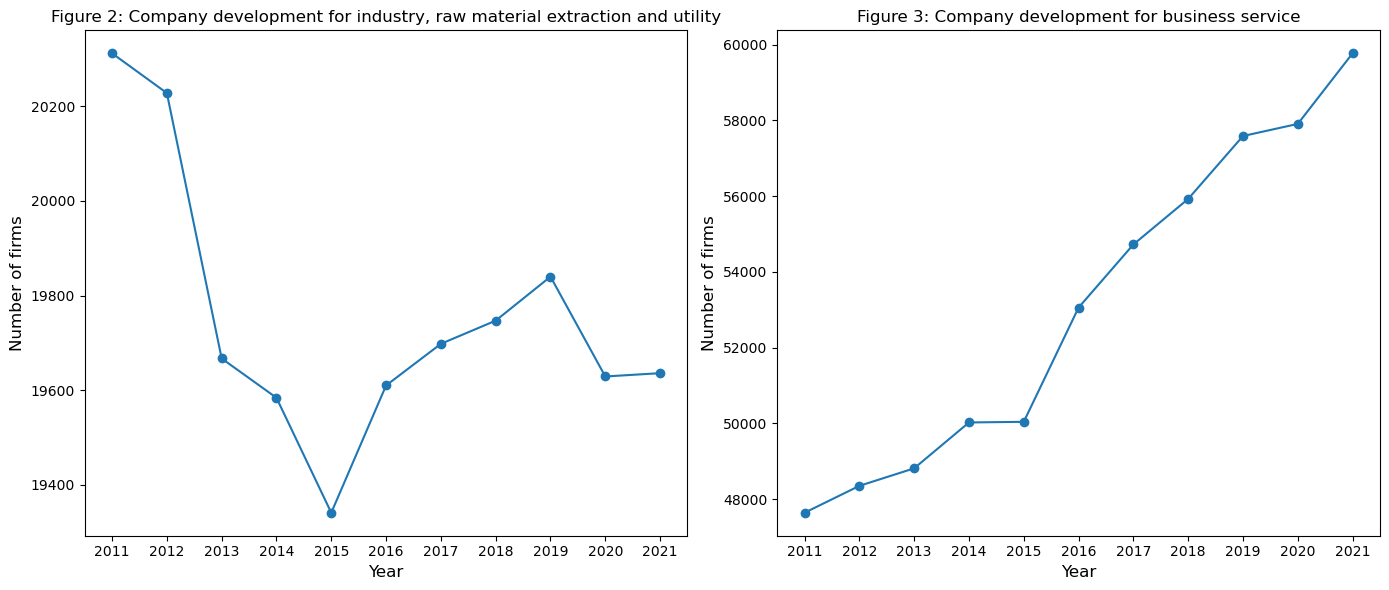

In [11]:
#We create a figure with two subplots with 1 row and 2 columns - two figures beside each other.
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#First we plot industry, raw material extraction and utility and extract the year part from the column names in the x-axis labels 
#so it just shows the year instead if firmYYYY.
firm_index = 0
firm_data = firm.iloc[firm_index, 2:]
years = [col[4:] for col in firm_data.index]
#We plot the data for the first sector on the first subplot with markers 'o' at each data point.
axs[0].plot(years, firm_data.values, marker='o')
axs[0].set_title("Figure 2: Company development for industry, raw material extraction and utility", fontsize=12)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('Number of firms', fontsize=12)
axs[0].set_xticks(range(len(years)))
axs[0].set_xticklabels(years)

#We now select another sector for the second plot: Business service and follow the same procedure.
firm_index = 5
firm_data = firm.iloc[firm_index, 2:]
years = [col[4:] for col in firm_data.index]
axs[1].plot(years, firm_data.values, marker='o')
axs[1].set_title("Figure 3: Company development for business service", fontsize=12)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Number of firms', fontsize=12)
axs[1].set_xticks(range(len(years)))
axs[1].set_xticklabels(years)

plt.tight_layout()
plt.show()

We observe that the industry sector has experienced significant fluctuations and a general downward trend over the years. In contrast, the business service sector has shown substantial growth in the number of companies from 2011 to 2021

We will now examine the overall development in the number of firms in Denmark compared to the base year 2010 to see if there has been an overall increase in the number of firms.

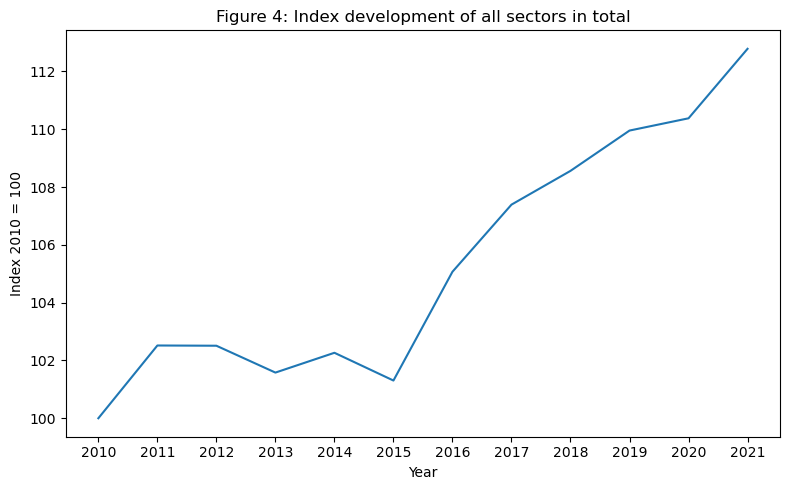

In [12]:
#We sum the number of firms across all sectors for each year.
total_firms = firm.iloc[:, 1:].sum(axis=0)

#We calculate the index with 2010 as the base year. 
base_year = 2010
index = (total_firms / total_firms[f'firm{base_year}']) * 100

#We extract the year part from the column names in the x-axis labels so it just shows the year instead if firmYYYY.
years = [col[4:] for col in total_firms.index]

#We plot the index development over time.
plt.figure(figsize=(8, 5))
plt.plot(years, index)

#We set the title and axis labels.
plt.title('Figure 4: Index development of all sectors in total', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Index 2010 = 100', fontsize=10)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

From 2010 to 2011, there is a slight increase, with the index rising to around 102, indicating modest growth. Between 2011 and 2014, the index remains relatively stable, fluctuating around 102-103, showing minimal changes in the number of firms. In 2014-2016, the index experiences a small decline, dropping below 102, indicating a decrease in the number of firms, possibly due to economic challenges. From 2016 onwards, the index shows significant growth. This upward trend continues, and by 2021, the index exceeds 112, reflecting sustained growth and a significant increase in the number of firms compared to 2010.

In summary, the number of firms in Denmark grew modestly until 2014, declined slightly until 2016, and then experienced significant growth, increasing by approximately 12% from 2010 to 2021.

We will now construct a stacked bar chart to depict the number of companies within each sector, facilitating a comparison across different industries from 2021 to 2021.

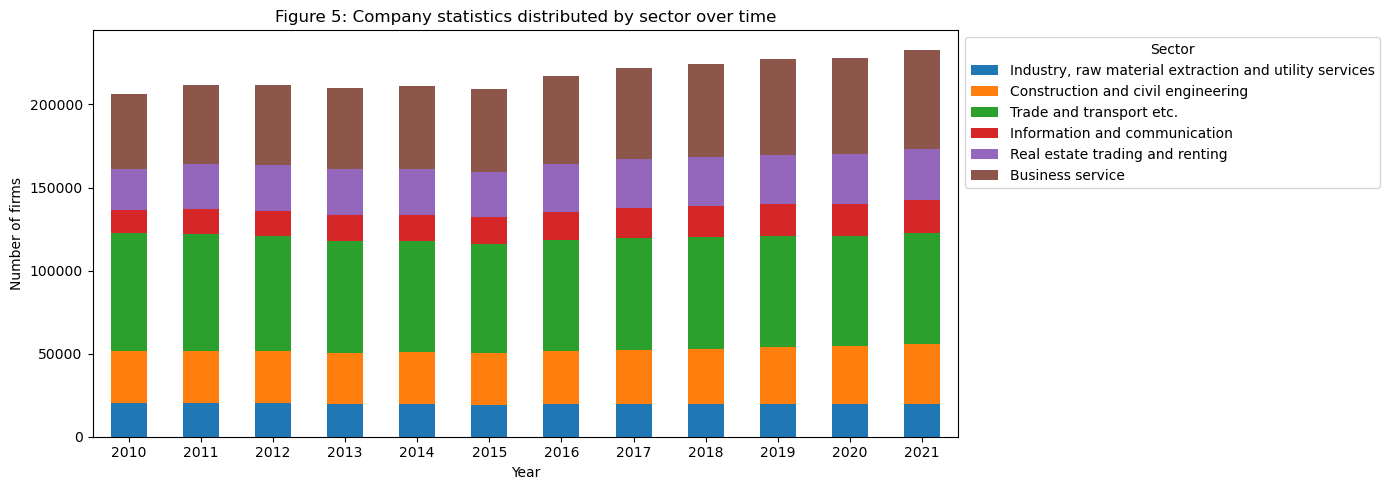

In [13]:
#We set 'Sector' as the index for the dataframe.
firm.set_index('Sector', inplace=True)

#We transpose the dataframe and plot it as a stacked bar chart.
firm.T.plot(kind='bar', stacked=True, figsize=(14, 5))

#We set the title and axis labels.
plt.title("Figure 5: Company statistics distributed by sector over time")
plt.xlabel('Year')
plt.ylabel('Number of firms')

#We extract the year part from the column names in the x-axis labels so it just shows the year instead if firmYYYY.
years = [col[4:] for col in firm.T.index]
plt.xticks(ticks=range(len(years)), labels=years, rotation=0)

#We place the legend outside the plot area
plt.legend(title='Sector', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

The figure presents the distribution of the number of firms across various sectors in Denmark from 2010 to 2021. There is a visible increase in the total number of firms over the years, which figure 4 also showed. This indicates overall growth in the business landscape in Denmark across the observed period. The trade and transport and business service sectors are the dominant ones. The business service sector shows a steady and notable increase over the years, reflecting significant growth and expansion in this area. Trade and transport semmes to despite being the largest sector by the number of firms, have slowed down in recent years. This could indicate market saturation or other challenges within the sector. Business service increases continuous suggesting a dynamic and expanding sector, likely driven by evolving market needs and business models.

We will now calculate the annual growth rates for each sector to determine which sectors are expanding most rapidly. This analysis will offer insights into the economic dynamics and indicate which sectors are the most robust drivers of growth.

In [14]:
#We reset the index to bring 'Sector' back as a column.
firm_reset = firm.reset_index()

#We compute the annual growth rates for each sector. We start by initializing an empty dataframe with the same index as firm_reset.
growth_rates = pd.DataFrame(index=firm_reset.index)
#We start a loop that will iterate over the years 2010 to 2021.
for i in range(2010, 2021):
    #We create a string that represents the column name for the current year.
    year_column = f'firm{i}'
    #We create a string that represents the column name for the next year.
    next_year_column = f'firm{i+1}'
    #We check if the column for the next year exists in the firm_reset dataframe.
    if next_year_column in firm_reset.columns:
        #We calculate the growth rate for the next year by dividing the values in the next_year_column by the values in 
        #the year_column and subtracting 1. This calculation gives the relative growth rate.
        growth_rates[next_year_column] = (firm_reset[next_year_column] / firm_reset[year_column]) - 1

#We calculate the growth rates in percentage.
growth_rates *= 100  

#We add the sector names to the growth rates.
growth_rates['Sector'] = firm_reset['Sector']  

#We move the 'Sector' column to the first position.
cols = ['Sector'] + [col for col in growth_rates.columns if col != 'Sector']
growth_rates = growth_rates[cols]

#We remove 'firm' from the column labels.
growth_rates.columns = ['Sector'] + [col.replace('firm', '') for col in growth_rates.columns if col != 'Sector']

#We round the values to two decimals.
growth_rates = growth_rates.round(2)

growth_rates

,Sector,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Industry, raw material extraction and utility ...",0.78,-0.41,-2.77,-0.42,-1.24,1.39,0.45,0.25,0.47,-1.06,0.04
1,Construction and civil engineering,-0.04,-0.87,-1.89,1.87,-0.27,2.49,2.10,2.03,1.89,2.41,3.43
2,Trade and transport etc.,-0.85,-1.31,-2.66,-1.29,-1.72,1.80,1.11,-0.65,0.04,-1.10,1.23
3,Information and communication,7.29,2.56,2.99,4.54,0.00,6.34,5.03,2.78,2.58,0.17,2.34
4,Real estate trading and renting,10.36,0.65,0.64,-0.40,-1.93,5.62,2.70,1.50,-0.03,2.20,2.11
5,Business service,4.65,1.49,0.96,2.48,0.03,6.03,3.14,2.20,2.97,0.56,3.22


We will now illustrate the values in a bar plot below.

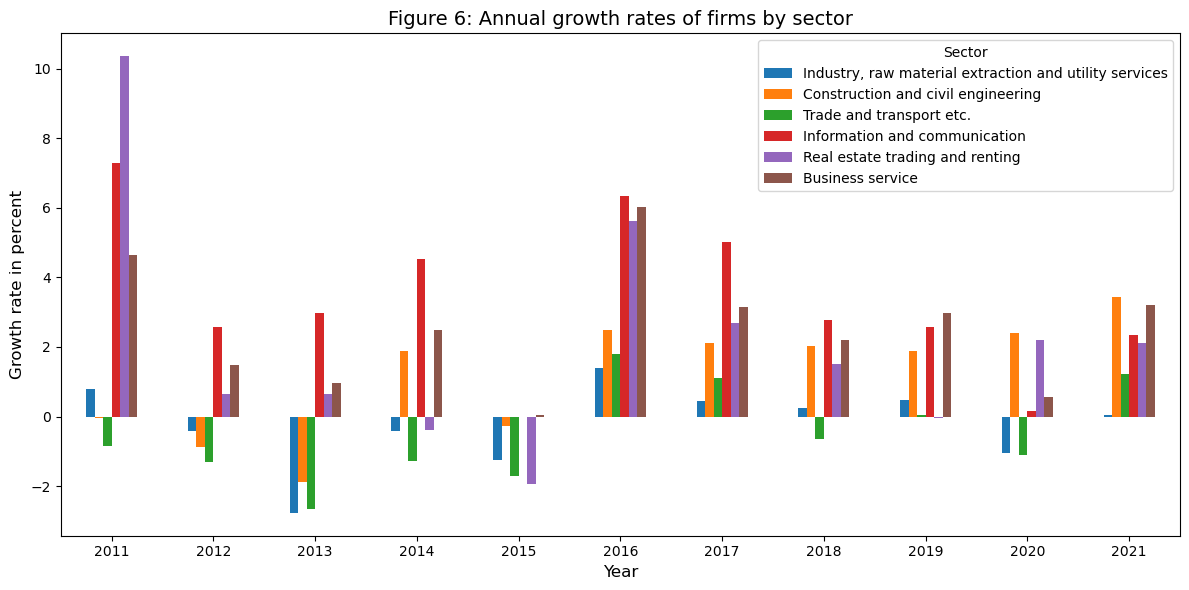

In [15]:
#We create the bar plot.
growth_rates.set_index('Sector').T.plot(kind='bar', figsize=(12, 6))

#We set the plot title and labels.
plt.title('Figure 6: Annual growth rates of firms by sector', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth rate in percent', fontsize=12)

#We rotate the x-axis labels.
plt.xticks(rotation=0)

#We display the legend outside the plot area.
plt.legend(title='Sector', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

The information and communication and business service sectors exhibit strong and consistent growth, particularly in 2011, 2016, and 2021. In contrast, the trade and transport and construction and civil engineering sectors experience fluctuations, with some periods of decline but overall maintaining an upward trend. The real estate trading and renting sector shows significant growth in 2011, a decline in 2015, and steady growth thereafter. The industry, raw material extraction, and utility sector has more volatile growth with lower and fluctuating rates compared to other sectors. The annual growth rates of firms in Denmark vary significantly by sector. Information and communication and business service sectors demonstrate robust and consistent growth. Other sectors like trade and transport and construction and civil engineering experience more variability but generally show positive trends. This indicates dynamic sector-specific growth patterns in Danish firms over the period.

# Conclusion

Our analysis of sectoral growth from 2010 to 2021 highlights key economic trends in Denmark. The information and communication sector grew significantly, from 13597 firms in 2010 to 19448 in 2021, averaging a 3.5% annual growth rate due to rising digital and communication needs. In contrast, the industry sector declined slightly, with firms decreasing from 20155 to 19636, reflecting challenges from global competition and technological changes.

The construction and civil engineering sector showed strong growth, especially after 2016, increasing from 31973 to 35949 firms. The business service sector also expanded, rising from 45520 firms in 2010 to 59768 in 2021, driven by demand for professional services. The trade and transport sector remained stable, showing resilience and recovery over the years.

These trends indicate a dynamic economic landscape. While some sectors are growing, others face challenges. Embracing technology and innovation in traditional industries will be crucial for a balanced and thriving economy. Our analysis reveals notable sectoral shifts, including the growth of information and communication and business services, the resilience of construction and civil engineering, and the decline of the industry sector.